# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [3]:
# <Student to fill this section>
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

---
## A. Project Description


In [4]:
# <Student to fill this section>
student_name = "Afraz Ul Rupak"
student_id = "25627377"

In [5]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [6]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## B. Business Understanding

In [7]:
# <Student to fill this section>
business_use_case_description = """
Explain clearly what is the goal of this project for the business.
"""

In [8]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [9]:
# <Student to fill this section>
business_objectives = """
What will be the impact of accurate or incorrect results?
"""

In [10]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [11]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
How will the results be used?
Who will be the users of your predictions? Who will be impacted by your predictions?
"""

In [12]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [13]:
# <Student to fill this section>
daily_df = pd.read_csv('~/weather_forecast/weather_forecast/data/raw/daily_with_targets.csv')
hourly_df = pd.read_csv('~/weather_forecast/weather_forecast/data/raw/hourly_with_targets.csv')

### C.2 Daily Weather Forecasting EDA

**Main Goal: Predict cumulative sum of precipitation**

In [14]:
# <Student to fill this section>
daily_df.head()

,date,temperature_2m_max,temperature_2m_min,temperature_2m_mean,relative_humidity_2m_max,relative_humidity_2m_min,pressure_msl_mean,wind_speed_10m_max,wind_speed_10m_mean,wind_direction_10m_dominant,precipitation_sum,rain_sum,shortwave_radiation_sum,daylight_duration,rain_in_7_days
0,2020-01-01,23.9,19.2,21.6,82,56,1014.3,19.6,16.3,168,0.0,0.0,28.18,51704.47,1
1,2020-01-02,25.2,20.2,22.1,86,55,1017.9,19.5,14.3,137,0.9,0.9,24.85,51671.07,1
2,2020-01-03,28.8,20.8,23.7,95,56,1014.4,26.3,14.4,67,1.7,1.7,26.92,51634.70,0
3,2020-01-04,41.8,19.9,29.4,97,18,1008.0,41.8,15.5,29,0.0,0.0,28.23,51595.43,1
4,2020-01-05,24.4,20.4,21.9,73,59,1017.9,34.6,24.8,169,0.2,0.2,22.91,51553.35,1


In [15]:
hourly_df.head()

,datetime,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,pressure_msl,cloud_cover,wind_speed_10m,wind_direction_10m,shortwave_radiation,surface_pressure,cloud_cover_low,cloud_cover_mid,cloud_cover_high,precipitation_next_72h
0,2020-01-01 00:00:00,19.7,78,15.8,0.0,0.0,1013.5,99,19.3,189,0.0,1007.5,63,97,18,2.6
1,2020-01-01 01:00:00,19.5,79,15.7,0.0,0.0,1012.8,100,19.6,193,0.0,1006.8,100,99,86,2.6
2,2020-01-01 02:00:00,19.5,78,15.5,0.0,0.0,1012.9,100,17.5,199,0.0,1006.9,100,77,70,2.6
3,2020-01-01 03:00:00,19.2,77,15.2,0.0,0.0,1012.5,100,17.7,197,0.0,1006.5,100,0,0,2.6
4,2020-01-01 04:00:00,19.6,74,14.8,0.0,0.0,1012.6,100,19.0,195,0.0,1006.6,100,0,0,2.6


## Hourly Weather Datas EDA

In [18]:
hourly_df['datetime'] = pd.to_datetime(hourly_df['datetime'], errors='coerce')
hourly_df['year'] = hourly_df['datetime'].dt.year.astype('int32')
hourly_df['month'] = hourly_df['datetime'].dt.month.astype('int32')
hourly_df['day'] = hourly_df['datetime'].dt.day.astype('int32')
hourly_df['hour'] = hourly_df['datetime'].dt.hour.astype('int32')

In [19]:
hourly_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   datetime                48120 non-null  datetime64[ns]
 1   temperature_2m          48120 non-null  float64       
 2   relative_humidity_2m    48120 non-null  int64         
 3   dew_point_2m            48120 non-null  float64       
 4   precipitation           48120 non-null  float64       
 5   rain                    48120 non-null  float64       
 6   pressure_msl            48120 non-null  float64       
 7   cloud_cover             48120 non-null  int64         
 8   wind_speed_10m          48120 non-null  float64       
 9   wind_direction_10m      48120 non-null  int64         
 10  shortwave_radiation     48120 non-null  float64       
 11  surface_pressure        48120 non-null  float64       
 12  cloud_cover_low         48120 non-null  int64 

In [20]:
hourly_df.describe(include='all')

,datetime,temperature_2m,relative_humidity_2m,dew_point_2m,precipitation,rain,pressure_msl,cloud_cover,wind_speed_10m,wind_direction_10m,shortwave_radiation,surface_pressure,cloud_cover_low,cloud_cover_mid,cloud_cover_high,precipitation_next_72h,year,month,day,hour
count,48120,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000,48120.000000
mean,2022-09-29 11:30:00,17.298202,74.844202,12.363759,0.139075,0.139075,1017.136656,51.801766,13.091311,188.416916,192.570968,1011.055409,24.373358,25.274460,27.801372,10.012057,2022.266334,6.249875,15.703242,11.500000
min,2020-01-01 00:00:00,2.200000,9.000000,-7.500000,0.000000,0.000000,986.700000,0.000000,0.000000,1.000000,0.000000,980.900000,0.000000,0.000000,0.000000,0.000000,2020.000000,1.000000,1.000000,0.000000
25%,2021-05-16 05:45:00,13.600000,64.000000,8.300000,0.000000,0.000000,1012.200000,8.000000,7.900000,95.000000,0.000000,1006.200000,0.000000,0.000000,0.000000,0.500000,2021.000000,3.000000,8.000000,5.750000
50%,2022-09-29 11:30:00,17.600000,77.000000,12.800000,0.000000,0.000000,1017.200000,50.000000,12.000000,193.000000,7.000000,1011.100000,7.000000,7.000000,0.000000,3.500000,2022.000000,6.000000,16.000000,11.500000
75%,2024-02-12 17:15:00,20.900000,88.000000,16.600000,0.000000,0.000000,1022.200000,99.000000,17.300000,280.000000,355.000000,1016.000000,37.000000,40.000000,65.000000,11.700000,2024.000000,9.000000,23.000000,17.250000
max,2025-06-27 23:00:00,41.800000,100.000000,27.200000,19.700000,19.700000,1039.000000,100.000000,48.800000,360.000000,1086.000000,1032.700000,100.000000,100.000000,100.000000,223.400000,2025.000000,12.000000,31.000000,23.000000
std,NaN,5.175723,16.247126,5.190979,0.594606,0.594606,7.133012,40.394027,6.729644,103.293491,270.732181,7.050846,33.327978,33.968918,40.355131,18.062750,1.597673,3.442459,8.788046,6.922258


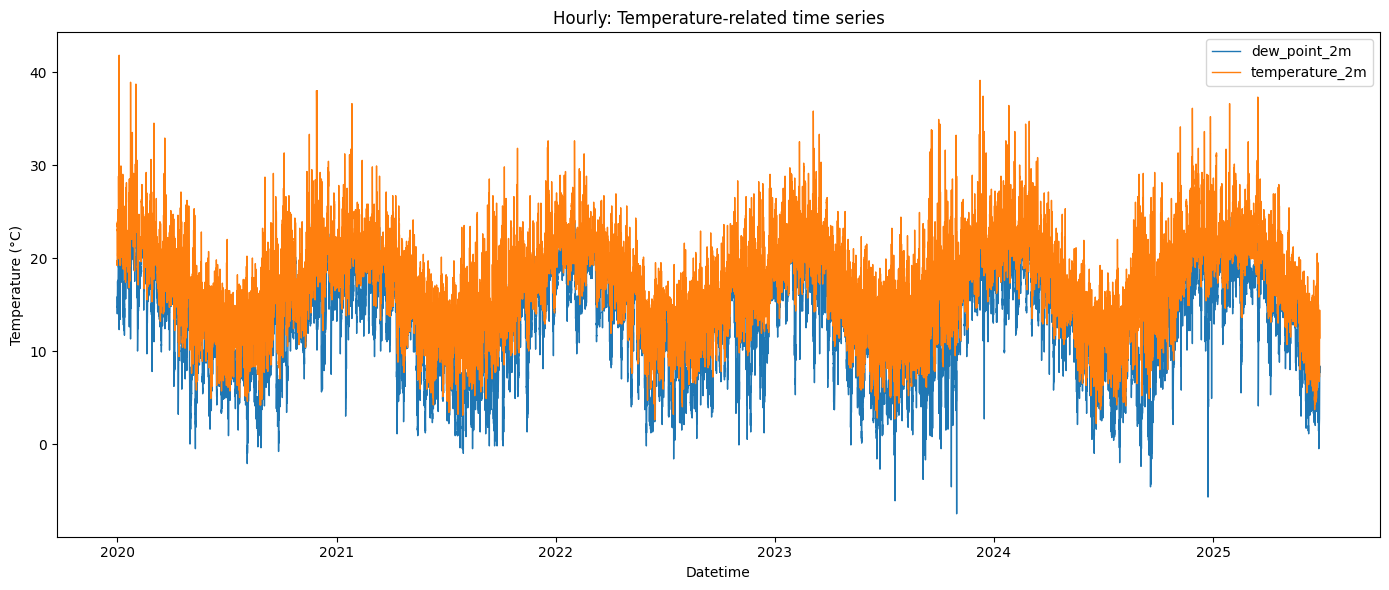

In [21]:

temp_cols = [
    c for c in hourly_df.columns
    if c != 'datetime'
    and hourly_df[c].dtype.kind in 'if'
    and any(k in c.lower() for k in ['temp', 'dew_point'])
]

if not temp_cols:
    print("No temperature-related columns found in hourly_df.")
else:
    plt.figure(figsize=(14, 6))
    for col in sorted(temp_cols):
        plt.plot(hourly_df['datetime'], hourly_df[col], label=col, linewidth=1)
    plt.xlabel('Datetime')
    plt.ylabel('Temperature (°C)')
    plt.title('Hourly: Temperature-related time series')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

In [22]:
# Hourly precipitation analysis
print("=== HOURLY PRECIPITATION ANALYSIS ===")
print(f"Hourly Dataset Shape: {hourly_df.shape}")
print(f"Mean hourly precipitation: {hourly_df['precipitation'].mean():.2f} mm")
print(f"Median hourly precipitation: {hourly_df['precipitation'].median():.2f} mm")
print(f"Max hourly precipitation: {hourly_df['precipitation'].max():.2f} mm")
print(f"Min hourly precipitation: {hourly_df['precipitation'].min():.2f} mm")
print(f"Standard deviation: {hourly_df['precipitation'].std():.2f} mm")
print(f"\nHours with no precipitation: {(hourly_df['precipitation'] == 0).sum()} ({(hourly_df['precipitation'] == 0).mean()*100:.1f}%)")
print(f"Hours with precipitation > 0: {(hourly_df['precipitation'] > 0).sum()} ({(hourly_df['precipitation'] > 0).mean()*100:.1f}%)")
print(f"Hours with heavy precipitation (>5mm): {(hourly_df['precipitation'] > 5).sum()} ({(hourly_df['precipitation'] > 5).mean()*100:.1f}%)")

=== HOURLY PRECIPITATION ANALYSIS ===
Hourly Dataset Shape: (48120, 20)
Mean hourly precipitation: 0.14 mm
Median hourly precipitation: 0.00 mm
Max hourly precipitation: 19.70 mm
Min hourly precipitation: 0.00 mm
Standard deviation: 0.59 mm

Hours with no precipitation: 37666 (78.3%)
Hours with precipitation > 0: 10454 (21.7%)
Hours with heavy precipitation (>5mm): 126 (0.3%)


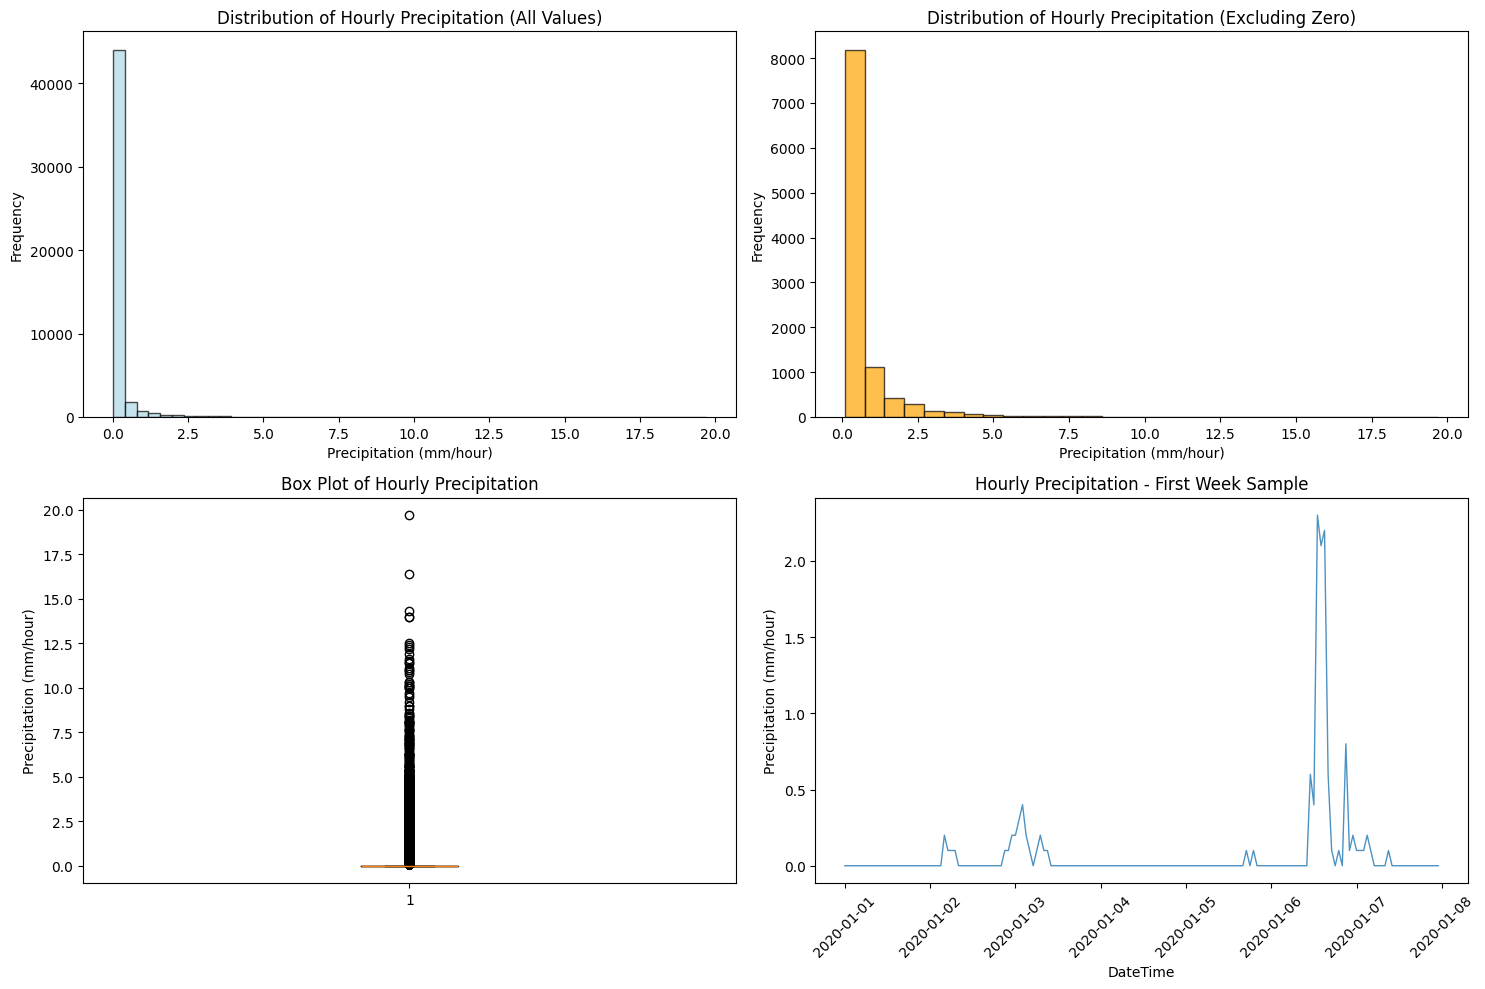

In [23]:
# Hourly precipitation distribution visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram of all hourly precipitation values
axes[0,0].hist(hourly_df['precipitation'], bins=50, alpha=0.7, color='lightblue', edgecolor='black')
axes[0,0].set_title('Distribution of Hourly Precipitation (All Values)')
axes[0,0].set_xlabel('Precipitation (mm/hour)')
axes[0,0].set_ylabel('Frequency')

# Histogram excluding zero values
non_zero_hourly_precip = hourly_df[hourly_df['precipitation'] > 0]['precipitation']
axes[0,1].hist(non_zero_hourly_precip, bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[0,1].set_title('Distribution of Hourly Precipitation (Excluding Zero)')
axes[0,1].set_xlabel('Precipitation (mm/hour)')
axes[0,1].set_ylabel('Frequency')

# Box plot
axes[1,0].boxplot(hourly_df['precipitation'])
axes[1,0].set_title('Box Plot of Hourly Precipitation')
axes[1,0].set_ylabel('Precipitation (mm/hour)')

# Time series sample (first 7 days)
sample_data = hourly_df.head(24*7)  # First week
axes[1,1].plot(sample_data['datetime'], sample_data['precipitation'], alpha=0.8, linewidth=1)
axes[1,1].set_title('Hourly Precipitation - First Week Sample')
axes[1,1].set_xlabel('DateTime')
axes[1,1].set_ylabel('Precipitation (mm/hour)')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

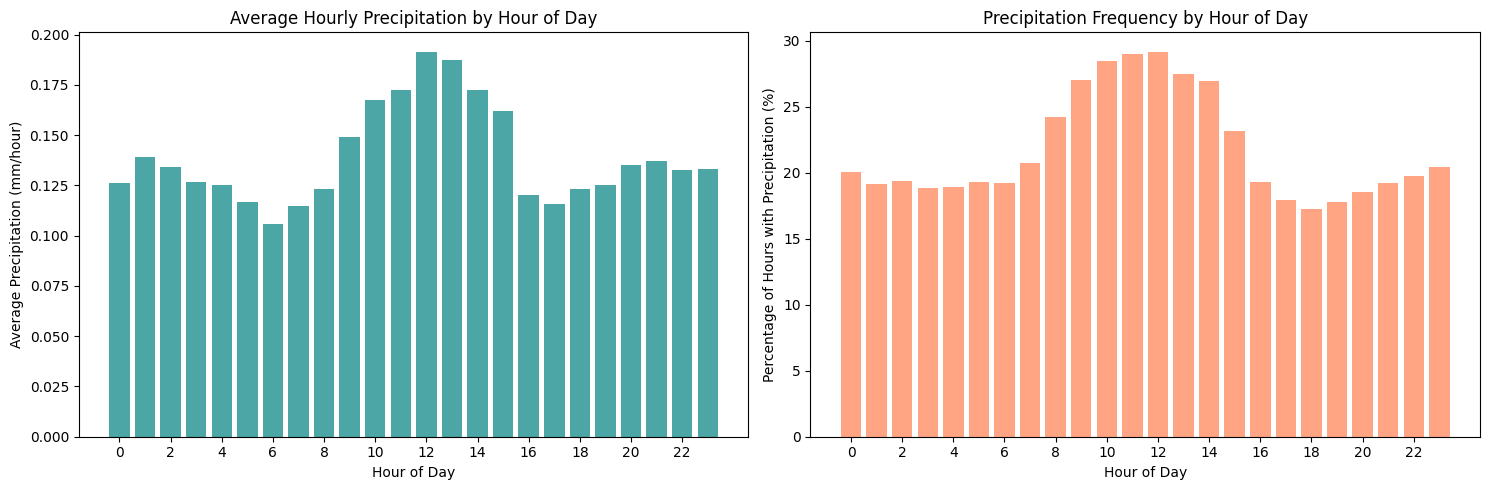

Hourly Precipitation Patterns:
    hour      mean    sum  count       std
0      0  0.126035  252.7   2005  0.577091
1      1  0.139002  278.7   2005  0.631551
2      2  0.134414  269.5   2005  0.583517
3      3  0.126584  253.8   2005  0.581327
4      4  0.125387  251.4   2005  0.586193
5      5  0.116608  233.8   2005  0.468071
6      6  0.105686  211.9   2005  0.417551
7      7  0.114564  229.7   2005  0.466457
8      8  0.123292  247.2   2005  0.467498
9      9  0.148928  298.6   2005  0.552553
10    10  0.167581  336.0   2005  0.710631
11    11  0.172618  346.1   2005  0.572179
12    12  0.191621  384.2   2005  0.677695
13    13  0.187581  376.1   2005  0.717134
14    14  0.172668  346.2   2005  0.692346
15    15  0.162294  325.4   2005  0.722275
16    16  0.120349  241.3   2005  0.528126
17    17  0.115910  232.4   2005  0.479480
18    18  0.123192  247.0   2005  0.557507
19    19  0.125387  251.4   2005  0.534983
20    20  0.135312  271.3   2005  0.722783
21    21  0.136958  274

In [24]:
# Hourly patterns analysis
hourly_patterns = hourly_df.groupby('hour')['precipitation'].agg(['mean', 'sum', 'count', 'std']).reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Average precipitation by hour of day
axes[0].bar(hourly_patterns['hour'], hourly_patterns['mean'], alpha=0.7, color='teal')
axes[0].set_title('Average Hourly Precipitation by Hour of Day')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Average Precipitation (mm/hour)')
axes[0].set_xticks(range(0, 24, 2))

# Precipitation frequency by hour
precip_freq_by_hour = hourly_df[hourly_df['precipitation'] > 0].groupby('hour').size()
total_by_hour = hourly_df.groupby('hour').size()
precip_percentage = (precip_freq_by_hour / total_by_hour * 100).fillna(0)

axes[1].bar(precip_percentage.index, precip_percentage.values, alpha=0.7, color='coral')
axes[1].set_title('Precipitation Frequency by Hour of Day')
axes[1].set_xlabel('Hour of Day')
axes[1].set_ylabel('Percentage of Hours with Precipitation (%)')
axes[1].set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()

print("Hourly Precipitation Patterns:")
print(hourly_patterns)

Comparison between daily and hourly aggregated precipitation:
Correlation: 1.0000
Mean absolute difference: 0.0000 mm


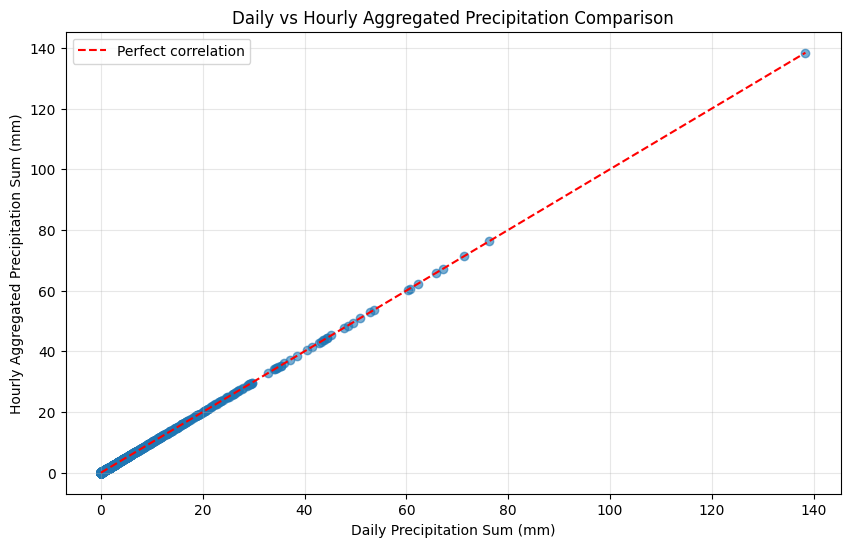

In [25]:
# Daily aggregation from hourly data for comparison
hourly_df['date'] = hourly_df['datetime'].dt.date
hourly_daily_agg = hourly_df.groupby('date')['precipitation'].sum().reset_index()
hourly_daily_agg.columns = ['date', 'hourly_sum_precipitation']

# Compare with actual daily data
daily_df['date_only'] = pd.to_datetime(daily_df['date']).dt.date
comparison_df = pd.merge(daily_df[['date_only', 'precipitation_sum']], 
                        hourly_daily_agg, left_on='date_only', right_on='date', how='inner')

print(f"Comparison between daily and hourly aggregated precipitation:")
print(f"Correlation: {comparison_df['precipitation_sum'].corr(comparison_df['hourly_sum_precipitation']):.4f}")
print(f"Mean absolute difference: {abs(comparison_df['precipitation_sum'] - comparison_df['hourly_sum_precipitation']).mean():.4f} mm")

# Scatter plot comparison
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['precipitation_sum'], comparison_df['hourly_sum_precipitation'], alpha=0.6)
plt.plot([0, comparison_df['precipitation_sum'].max()], [0, comparison_df['precipitation_sum'].max()], 'r--', label='Perfect correlation')
plt.xlabel('Daily Precipitation Sum (mm)')
plt.ylabel('Hourly Aggregated Precipitation Sum (mm)')
plt.title('Daily vs Hourly Aggregated Precipitation Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

=== HOURLY CORRELATION WITH PRECIPITATION ===
precipitation             1.000000
rain                      1.000000
cloud_cover_mid           0.365660
precipitation_next_72h    0.274772
cloud_cover               0.241350
cloud_cover_low           0.225036
cloud_cover_high          0.220229
relative_humidity_2m      0.178432
dew_point_2m              0.148063
wind_speed_10m            0.140212
temperature_2m            0.025896
hour                      0.004800
year                     -0.012412
day                      -0.024564
month                    -0.051424
surface_pressure         -0.054588
pressure_msl             -0.054764
shortwave_radiation      -0.067444
wind_direction_10m       -0.077434
Name: precipitation, dtype: float64


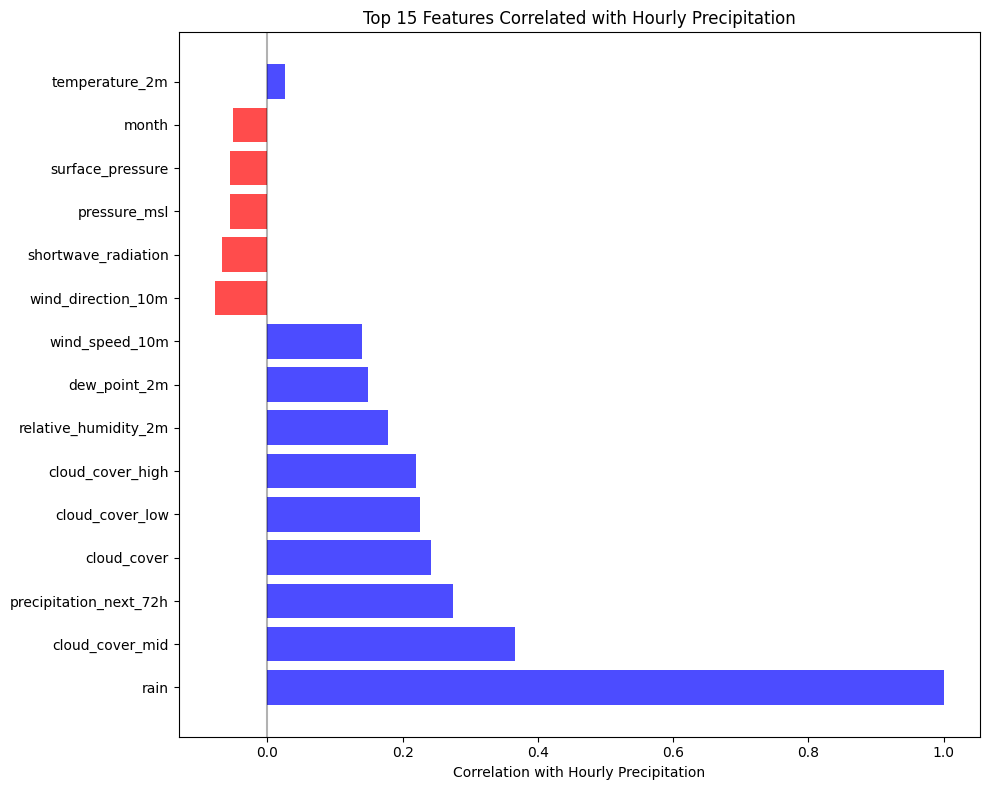

In [26]:
# Correlation analysis for hourly data
hourly_numeric_cols = hourly_df.select_dtypes(include=[np.number]).columns.tolist()
hourly_correlation_with_precip = hourly_df[hourly_numeric_cols].corr()['precipitation'].sort_values(ascending=False)

print("=== HOURLY CORRELATION WITH PRECIPITATION ===")
print(hourly_correlation_with_precip)

# Visualize top correlations for hourly data
plt.figure(figsize=(10, 8))
top_hourly_corr = hourly_correlation_with_precip.drop('precipitation').abs().sort_values(ascending=False)[:15]
colors = ['red' if x < 0 else 'blue' for x in hourly_correlation_with_precip[top_hourly_corr.index]]
plt.barh(range(len(top_hourly_corr)), hourly_correlation_with_precip[top_hourly_corr.index], color=colors, alpha=0.7)
plt.yticks(range(len(top_hourly_corr)), top_hourly_corr.index)
plt.xlabel('Correlation with Hourly Precipitation')
plt.title('Top 15 Features Correlated with Hourly Precipitation')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

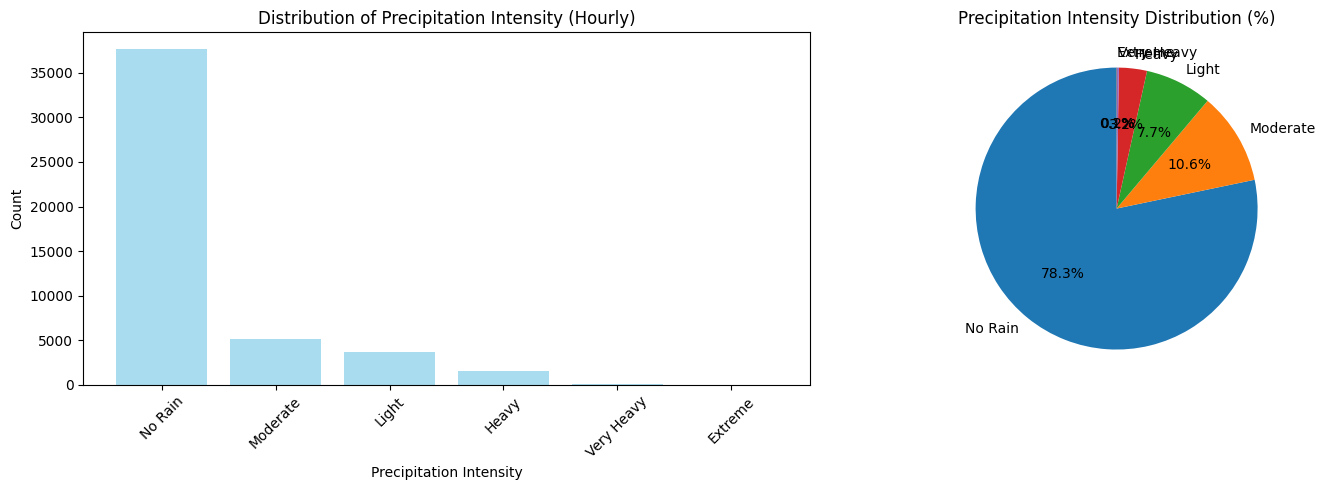

Precipitation Intensity Analysis:
No Rain: 37666 hours (78.3%)
Moderate: 5083 hours (10.6%)
Light: 3704 hours (7.7%)
Heavy: 1541 hours (3.2%)
Very Heavy: 101 hours (0.2%)
Extreme: 25 hours (0.1%)


In [27]:
# Precipitation intensity analysis
hourly_df['precip_intensity'] = pd.cut(hourly_df['precipitation'], 
                                      bins=[-0.1, 0, 0.1, 1, 5, 10, float('inf')],
                                      labels=['No Rain', 'Light', 'Moderate', 'Heavy', 'Very Heavy', 'Extreme'])

intensity_counts = hourly_df['precip_intensity'].value_counts()
intensity_percentages = hourly_df['precip_intensity'].value_counts(normalize=True) * 100

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Precipitation intensity distribution
axes[0].bar(intensity_counts.index, intensity_counts.values, alpha=0.7, color='skyblue')
axes[0].set_title('Distribution of Precipitation Intensity (Hourly)')
axes[0].set_xlabel('Precipitation Intensity')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Precipitation intensity percentages
axes[1].pie(intensity_percentages.values, labels=intensity_percentages.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Precipitation Intensity Distribution (%)')

plt.tight_layout()
plt.show()

print("Precipitation Intensity Analysis:")
for category, count, percentage in zip(intensity_counts.index, intensity_counts.values, intensity_percentages.values):
    print(f"{category}: {count} hours ({percentage:.1f}%)")

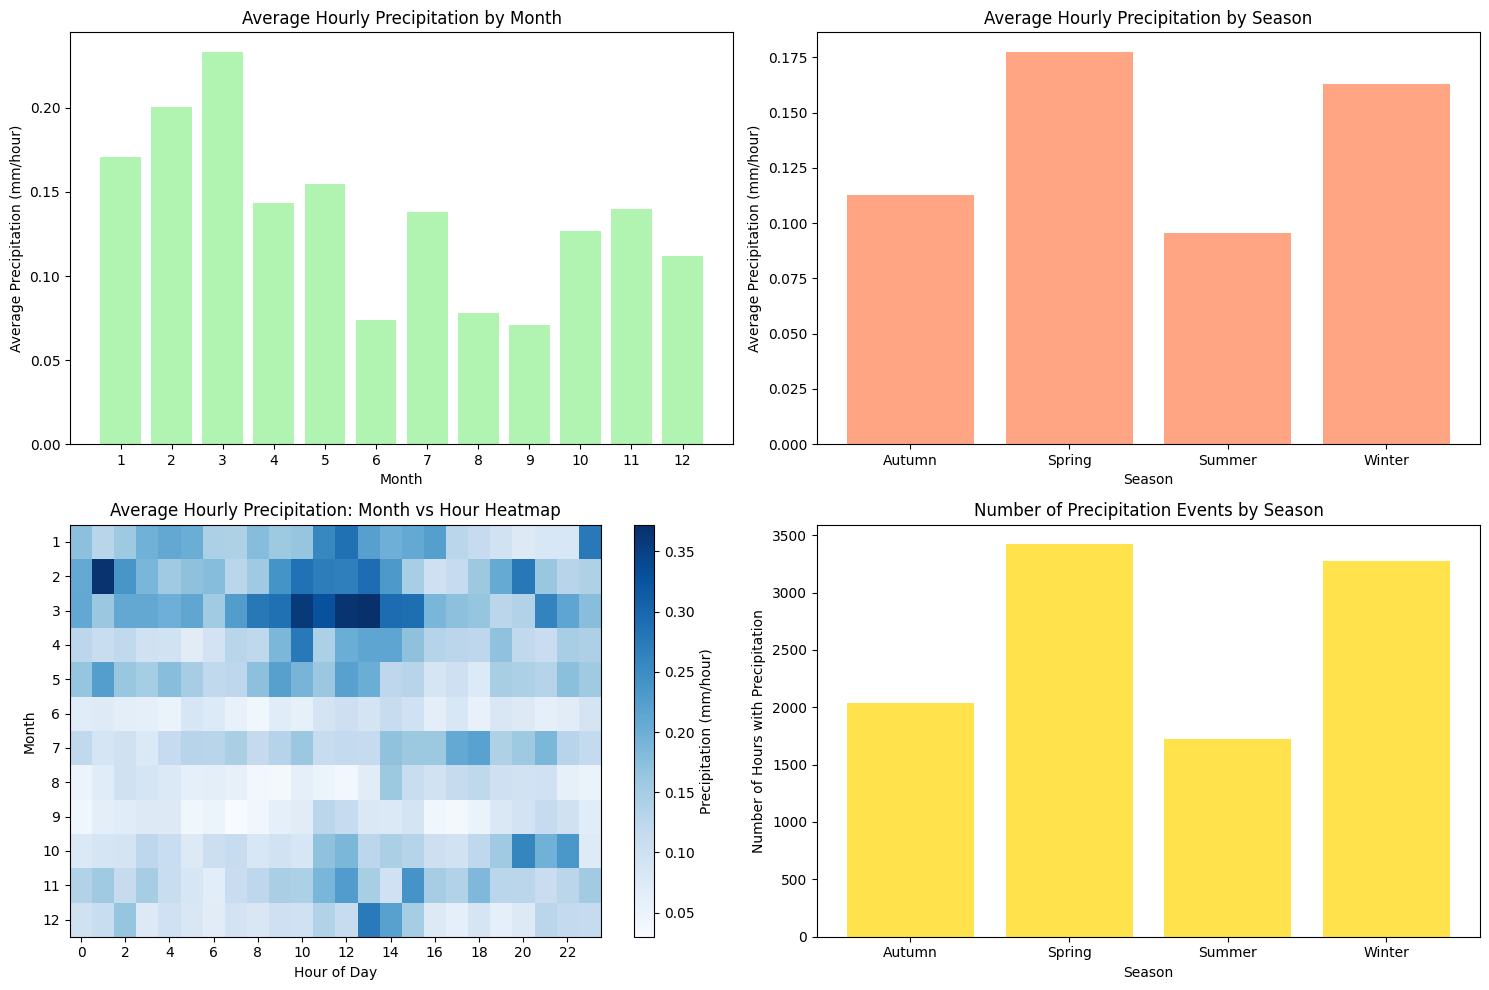

In [28]:
# Seasonal and monthly patterns in hourly data
hourly_df['season'] = hourly_df['month'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                                             3: 'Spring', 4: 'Spring', 5: 'Spring',
                                             6: 'Summer', 7: 'Summer', 8: 'Summer',
                                             9: 'Autumn', 10: 'Autumn', 11: 'Autumn'})

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Monthly hourly precipitation patterns
monthly_hourly = hourly_df.groupby('month')['precipitation'].agg(['mean', 'sum']).reset_index()
axes[0,0].bar(monthly_hourly['month'], monthly_hourly['mean'], alpha=0.7, color='lightgreen')
axes[0,0].set_title('Average Hourly Precipitation by Month')
axes[0,0].set_xlabel('Month')
axes[0,0].set_ylabel('Average Precipitation (mm/hour)')
axes[0,0].set_xticks(range(1, 13))

# Seasonal hourly precipitation
seasonal_hourly = hourly_df.groupby('season')['precipitation'].agg(['mean', 'sum']).reset_index()
axes[0,1].bar(seasonal_hourly['season'], seasonal_hourly['mean'], alpha=0.7, color='coral')
axes[0,1].set_title('Average Hourly Precipitation by Season')
axes[0,1].set_xlabel('Season')
axes[0,1].set_ylabel('Average Precipitation (mm/hour)')

# Heatmap: Hour vs Month precipitation
hourly_heatmap_data = hourly_df.groupby(['month', 'hour'])['precipitation'].mean().unstack()
im = axes[1,0].imshow(hourly_heatmap_data.values, cmap='Blues', aspect='auto')
axes[1,0].set_title('Average Hourly Precipitation: Month vs Hour Heatmap')
axes[1,0].set_xlabel('Hour of Day')
axes[1,0].set_ylabel('Month')
axes[1,0].set_xticks(range(0, 24, 2))
axes[1,0].set_xticklabels(range(0, 24, 2))
axes[1,0].set_yticks(range(12))
axes[1,0].set_yticklabels(range(1, 13))
plt.colorbar(im, ax=axes[1,0], label='Precipitation (mm/hour)')

# Precipitation events per season
precip_events_season = hourly_df[hourly_df['precipitation'] > 0].groupby('season').size()
axes[1,1].bar(precip_events_season.index, precip_events_season.values, alpha=0.7, color='gold')
axes[1,1].set_title('Number of Precipitation Events by Season')
axes[1,1].set_xlabel('Season')
axes[1,1].set_ylabel('Number of Hours with Precipitation')

plt.tight_layout()
plt.show()

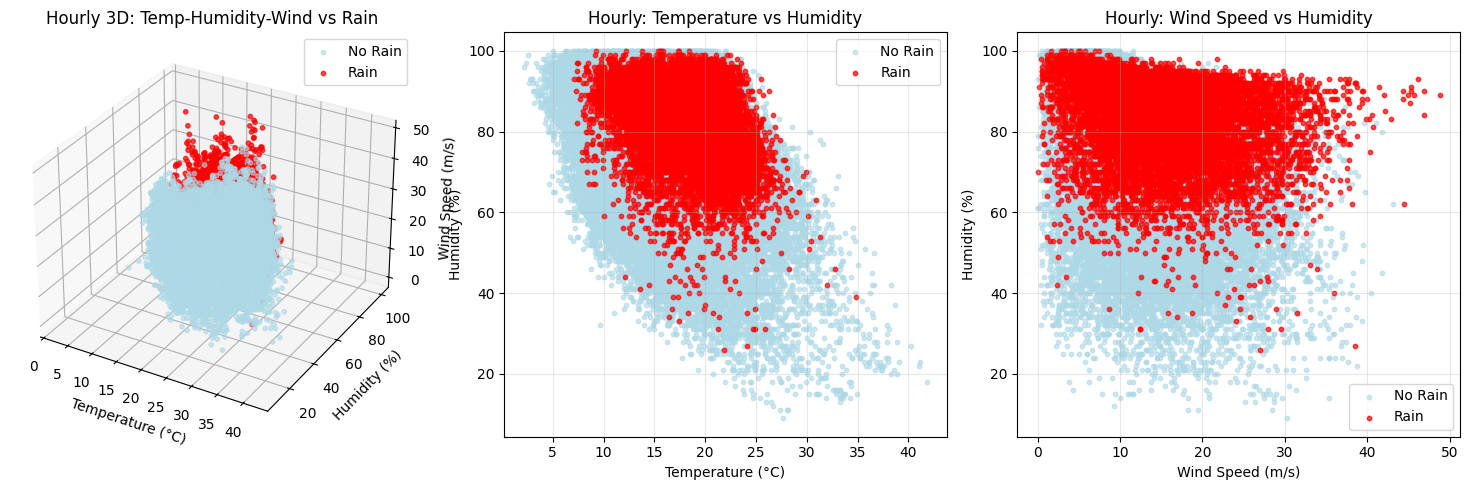

In [ ]:
# 3D and 2D scatter analysis for hourly_df
from mpl_toolkits.mplot3d import Axes3D  A

# Columns to use
temp_col_hr = 'temperature_2m'
humidity_col_hr = 'relative_humidity_2m'
wind_col_hr = 'wind_speed_10m'

# Prepare data
hourly_df_sorted = hourly_df.sort_values('datetime').copy()
hourly_df_sorted['rain_binary'] = (hourly_df_sorted['precipitation'] > 0).astype(int)

rainy_hr = hourly_df_sorted[hourly_df_sorted['rain_binary'] == 1]
non_rainy_hr = hourly_df_sorted[hourly_df_sorted['rain_binary'] == 0]

# Plot
fig_hourly = plt.figure(figsize=(15, 5))

# 3D scatter: Temp-Humidity-Wind colored by rain
ax_3d = fig_hourly.add_subplot(131, projection='3d')
ax_3d.scatter(non_rainy_hr[temp_col_hr], non_rainy_hr[humidity_col_hr], non_rainy_hr[wind_col_hr],
              c='lightblue', alpha=0.6, s=10, label='No Rain')
ax_3d.scatter(rainy_hr[temp_col_hr], rainy_hr[humidity_col_hr], rainy_hr[wind_col_hr],
              c='red', alpha=0.7, s=10, label='Rain')
ax_3d.set_xlabel('Temperature (°C)')
ax_3d.set_ylabel('Humidity (%)')
ax_3d.set_zlabel('Wind Speed (m/s)')
ax_3d.set_title('Hourly 3D: Temp-Humidity-Wind vs Rain')
ax_3d.legend()

# 2D projection: Temperature vs Humidity
ax_2d_th = fig_hourly.add_subplot(132)
ax_2d_th.scatter(non_rainy_hr[temp_col_hr], non_rainy_hr[humidity_col_hr],
                 c='lightblue', alpha=0.6, s=10, label='No Rain')
ax_2d_th.scatter(rainy_hr[temp_col_hr], rainy_hr[humidity_col_hr],
                 c='red', alpha=0.7, s=10, label='Rain')
ax_2d_th.set_xlabel('Temperature (°C)')
ax_2d_th.set_ylabel('Humidity (%)')
ax_2d_th.set_title('Hourly: Temperature vs Humidity')
ax_2d_th.legend()
ax_2d_th.grid(True, alpha=0.3)

# 2D projection: Wind Speed vs Humidity
ax_2d_wh = fig_hourly.add_subplot(133)
ax_2d_wh.scatter(non_rainy_hr[wind_col_hr], non_rainy_hr[humidity_col_hr],
                 c='lightblue', alpha=0.6, s=10, label='No Rain')
ax_2d_wh.scatter(rainy_hr[wind_col_hr], rainy_hr[humidity_col_hr],
                 c='red', alpha=0.7, s=10, label='Rain')
ax_2d_wh.set_xlabel('Wind Speed (m/s)')
ax_2d_wh.set_ylabel('Humidity (%)')
ax_2d_wh.set_title('Hourly: Wind Speed vs Humidity')
ax_2d_wh.legend()
ax_2d_wh.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()